Q1. 1 Fit a linear regression model on data: USA_housing.csv to predict the Price of the house.

In [1]:
from matplotlib import style
from matplotlib import pyplot as plt

In [2]:
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
data_csv=pd.read_csv("/content/drive/MyDrive/DataMining/Files/USA_Housing.csv")

In [4]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


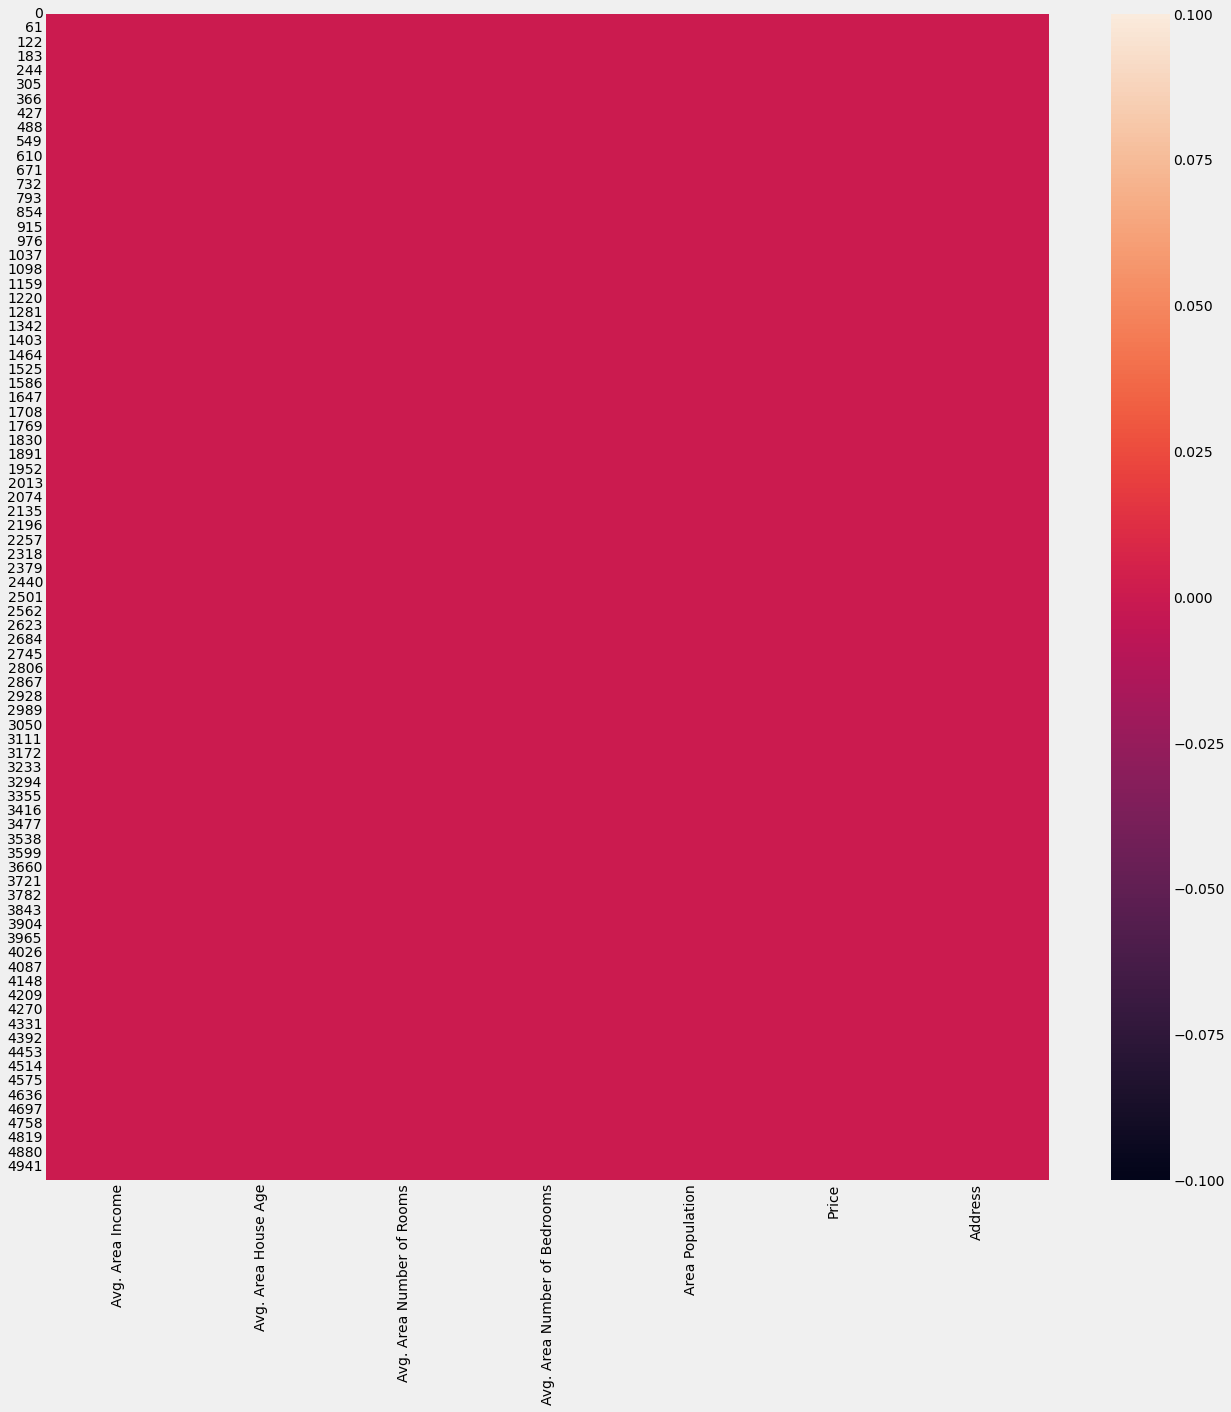

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data_csv.isnull()) ##to visualize the missing values
#data_csv.isnull().sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


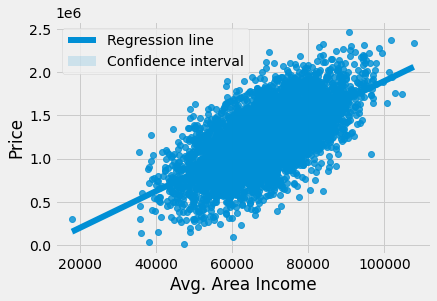

In [6]:
import seaborn as sns
ax = sns.regplot(data_csv["Avg. Area Income"],data_csv["Price"], line_kws={'label': 'Regression line'})
ax.collections[1].set_label('Confidence interval')
ax.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


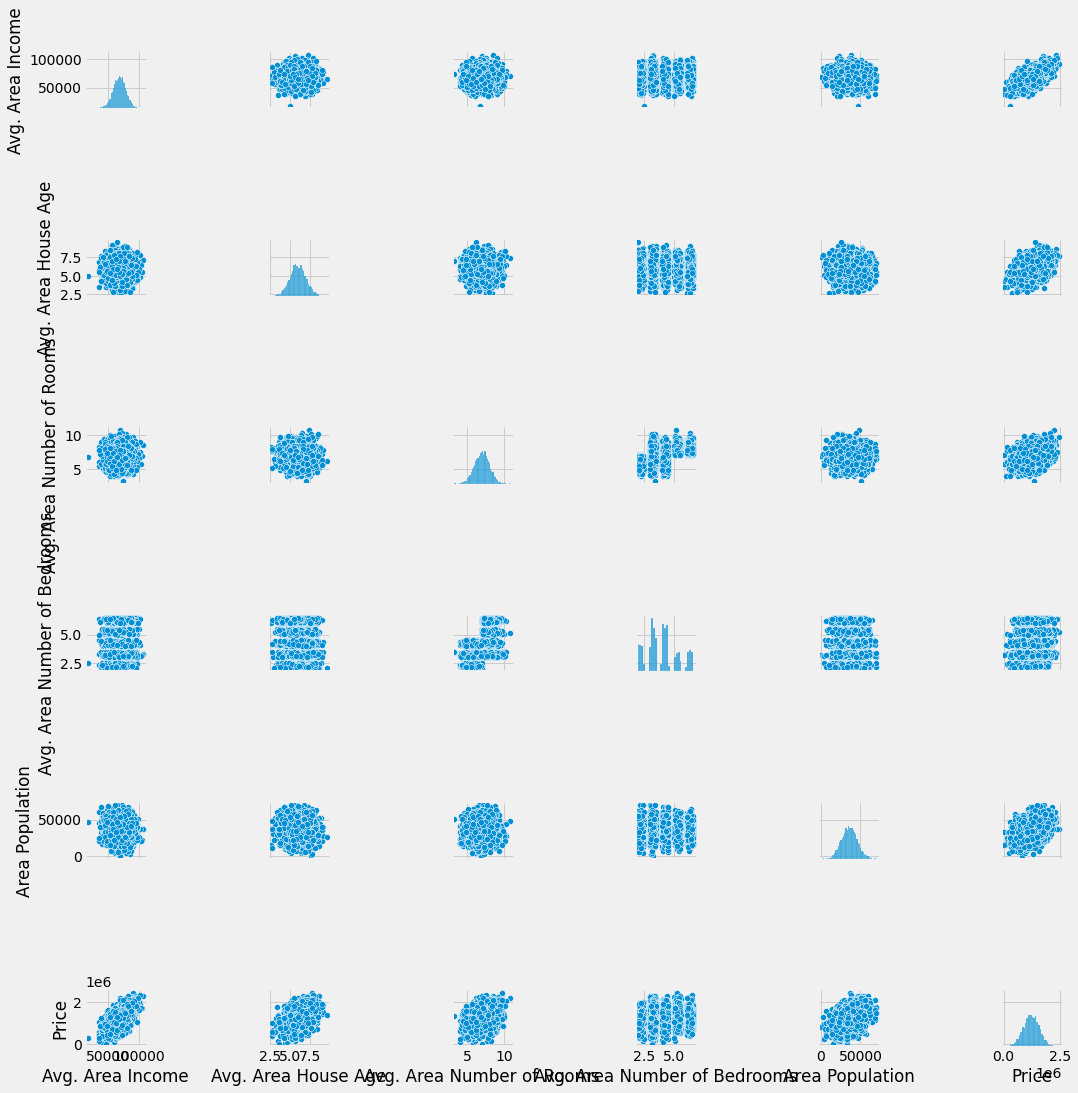

In [7]:
sns.pairplot(data_csv)

In [33]:
#*********************************************************************
"""Multiple linear regression"""

#Separating the x and y variables
X=data_csv[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]] 
Y=data_csv["Price"]

In [34]:
# Splitting the data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression #import regression model
lm = LinearRegression() #initialize the model
lm.fit(x_train,y_train) #fitting the model (or training it)

LinearRegression()

In [36]:
print ("Intercept: ", lm.intercept_)#this is the intercept 
print ("Coefficient: ", lm.coef_)#  the coefficient
print ("Coefficient:", lm.coef_.tolist())

Intercept:  -2641372.6673014304
Coefficient:  [2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]
Coefficient: [21.617634988436986, 165221.11987239204, 121405.37659573201, 1318.7187828817562, 15.225195512757637]


In [37]:
## Prediction for price
predictions=lm.predict(x_test)

In [38]:
# R square score
from sklearn.metrics import r2_score
r2=r2_score(y_test, predictions) 

# RMSE score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,predictions))
print("R-Square:", r2, "RMSE:", rmse)

R-Square: 0.9185060945363622 RMSE: 100842.08231635045


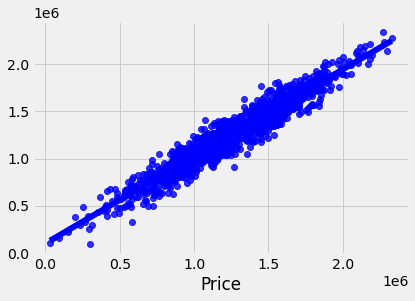

In [39]:
sns.regplot(x=y_test, y=predictions, ci=None, color="b")

Q1.2 Also try to see if the model performance can be improved with feature selection

In [15]:
# Improve our model using selectbest

from sklearn.feature_selection import SelectKBest, f_regression
for i in range(1,5):    
    bestfeatures=SelectKBest(score_func=f_regression,k=i)
    bestfeatures.fit(x_train,y_train)

In [16]:
# to extract data from a source, convert it into a usable format
new_x_train=bestfeatures.transform(x_train)
new_x_test=bestfeatures.transform(x_test)

In [17]:
##build a model using new_x_train
##test it on new_x_test
lm=LinearRegression()
lm.fit(new_x_train, y_train)

LinearRegression()

In [18]:
# New prediction model

prediction=lm.predict(new_x_test)

In [19]:
# RMSE and Rsquare value of new model

from sklearn.metrics import r2_score, mean_squared_error
r_2=r2_score(y_test, predictions)
        
mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
print("the number of variables are",i)
print ("new rmse is",rmse)
print("new r2 is", r_2)

the number of variables are 4
new rmse is 100842.08231635045
new r2 is 0.9185060945363622


In [20]:
# So choosing 4 variables the model would work better

Q2. What is the difference between correlation and regression?

The main 4 differences between correlation and regression is as below-

i.	Correlation does not imply causation. Correlation measures the degree of relationship between two variables whereas, regression analysis is how one variable affects the other or what changes it causes to the other. Regression could be linear (between two variables) or Multiple (between multiple variables)

ii.	Correlation does not capture causality but degree of inter-relation between two variables. Regression is based on causality. It shows no degree of connection but cause and effect.

iii.	A property of correlation is p(x,y)=p(y,x) . Regression of x on y and y on x yields different results. For an example incase of income and education, predicting income based on education makes sense but the opposite does not.

iv.	The two methods have very different graphical representation. Correlation is a single line. Regression is known for the best fitting line that goes through the data points and minimizes the distance between them.

Q3. Give three situations when correlation implies causation.

The relationship of correlation and causation is determined based on the other unknown factors which is not taken into consideration.
For example, one could run an experiment on identical twins who were known to consistently get the same grades on their tests. One twin is sent to study for six hours while the other is sent to the amusement park. If their test scores suddenly diverged by a large degree, this would be strong evidence that studying (or going to the amusement park) had a causal effect on test scores. In this case, correlation between studying and test scores would almost certainly imply causation. In this example we are saying there are no other factors or all other factors that can cause the grades are constant or same for both the twins.
Marriage and happiness index are correlated, Now is the marriage is causing the happiness or the causal direction is other way means more happy people ends up marrying is based on the unbiased randomized trial. 
In 1958, Epidemiologists includes Sir Richard Doll and sir Austin showed conclusively that Smoking causes cancer and also increase number of smoking and increase number of cancer shows correlation.

Q4. Give three situation when correlation does not imply causation: 

Situation 1 :
If we collect data for the total number of pool drownings each year and the total amount of energy produced by nuclear power plants each year, we would find that the two variables are highly correlated.

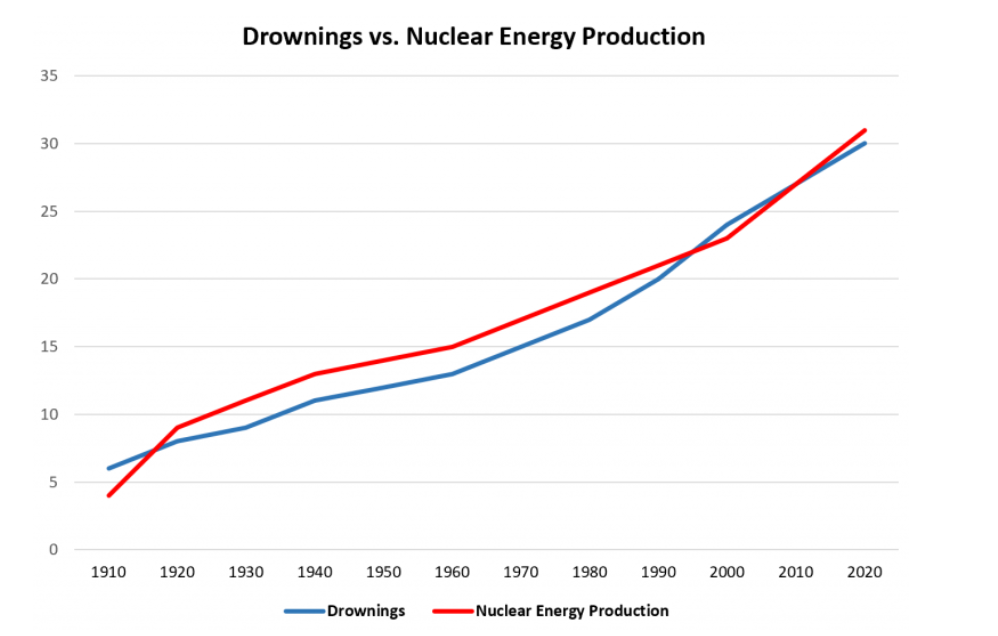 

Does this mean that increased pool drownings are somehow causing more nuclear energy to be produced?
Not exactly. The more likely explanation is that global population has been increasing, which means more people are drowning in pools and nuclear energy production is becoming more viable each year which explains why it has increased.
Although these two variables are highly correlated, one does not cause the other.

Situation 2: If we collect data for the total number of measles cases in the U.S. each year and the marriage rate each year, we would find that the two variables are highly correlated.

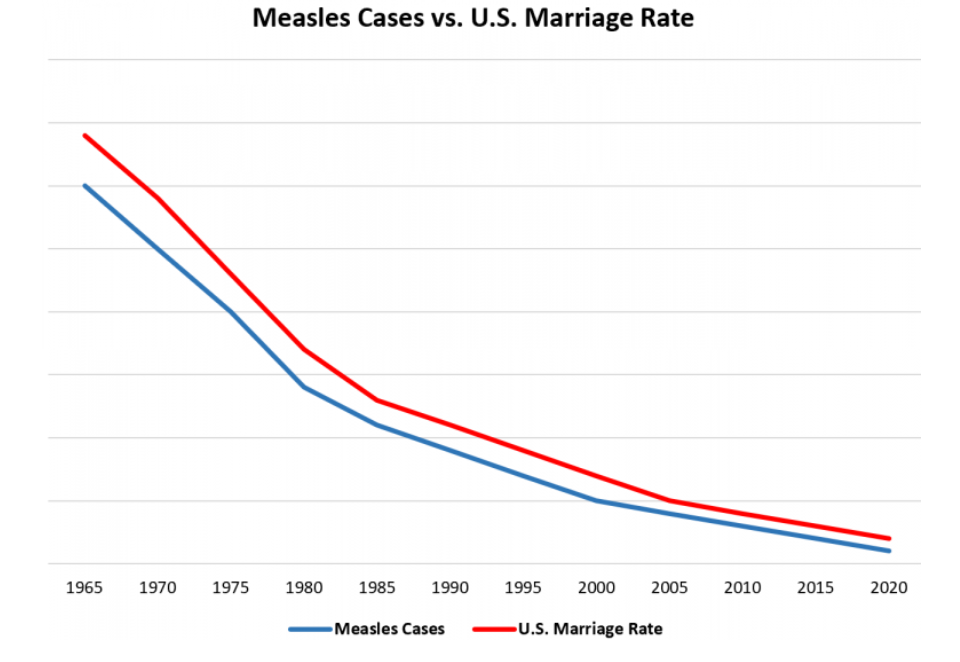 
Does this mean that reduced measles cases is causing lower marriage rates? Not exactly. Instead, the two variables are independent – modern medicine is causing measles cases to drop and fewer people are getting married due to various reasons each year. Although these two variables are highly correlated, one does not cause the other.

Situation 3 : If we collect data for the total number of high school graduates and total pizza consumption in the U.S. each year, we would find that the two variables are highly correlated.
 
 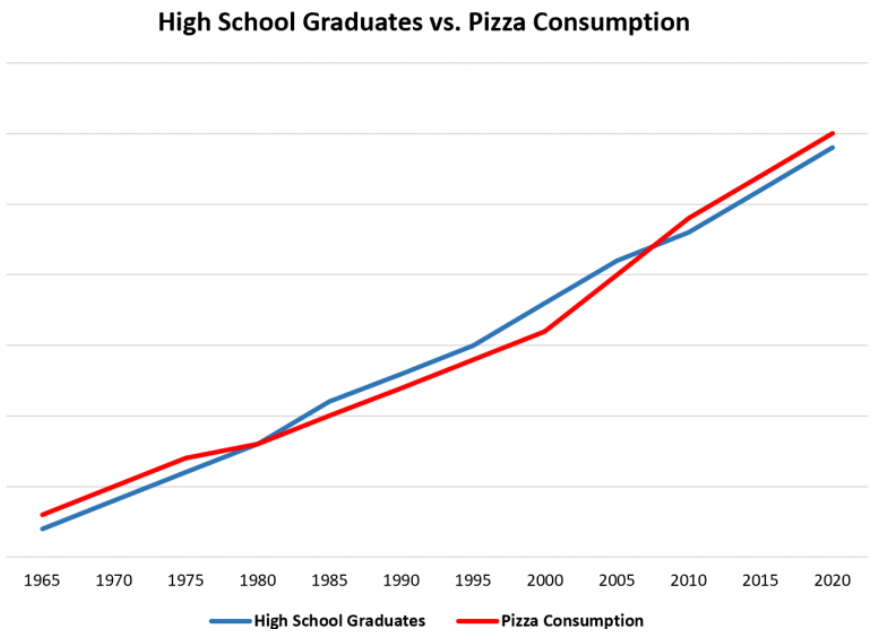
Does this mean that an increased number of high school graduates is leading to more pizza consumption in the United States? 
Not quite. The more likely explanation is that U.S. population has been increasing over time, which means that the number of people receiving a high school degree and the total pizza being consumed are both increasing as population increases. Although these two variables are correlated, one does not cause the other.

Q5. Explain the importance of bias and variance related to overfitting and underfitting and How to address it using regularization?
Bias is the difference between the average prediction of the model and the correct value which we are trying to predict. Any model with high bias would pay little attention to the training data and oversimplifies the model which leads to high error on training and test data.
Variance is the variability of the model prediction for a given data point or a value while explains the spread of the data. Model with high variance pays a lot of attention to training data and it does not generalize on the data it has not already seen. This kind of model perform very good on training dataset however, has high error rates on test data.
In a supervised learning, underfitting happens when the model is unable to capture the underlying pattern of the dataset. Usually, it has high bias and low variance. If we have less amount of data to build a model or we are trying to build a linear model with non-linear data can create an “underfitting”. Also, these models are very simple to capture the complexity and pattern of linear and logistic regression.
A model with low bias and high variance is prone to overfitting. If we train our model a lot with noisy data and also the training dataset covers most of the sample data can create a overfitting.
An optimal balance of bias and variance would never overfit or underfit the model. To overcome underfitting or high bias, we can add new parameters to our model so that the model complexity increases thus reducing high bias. To overcome overfitting, we could use methods like reducing model complexity and regularization, including more training data.
This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.

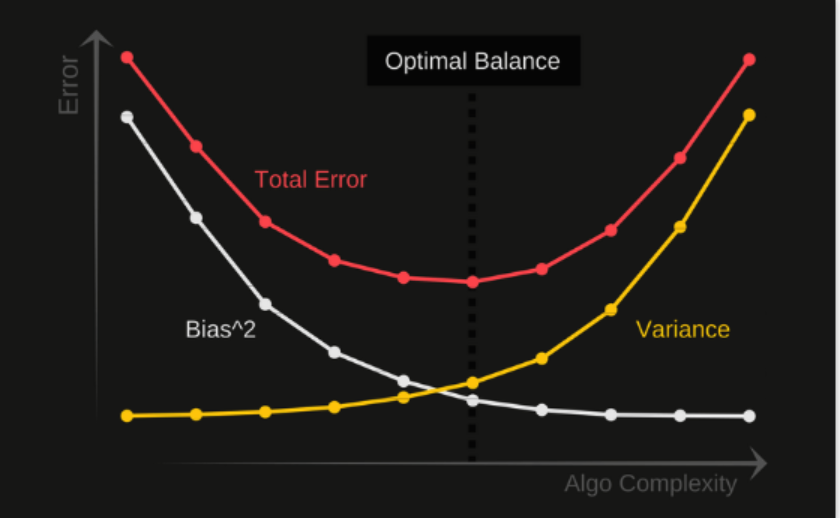